## 5.4 卷积神经网络CNN

### 5.4.1 什么是卷积神经网络
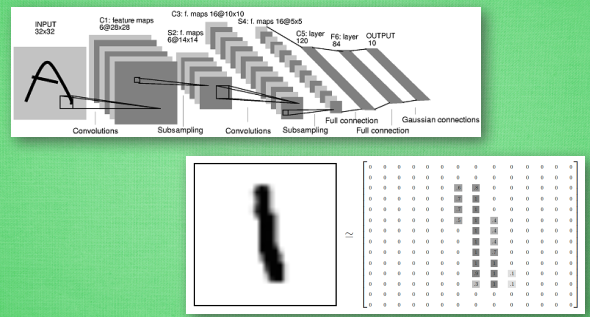

- **卷积神经网络**包含输入层、隐藏层和输出层，隐藏层又包含卷积层和pooling层，图像输入到卷积神经网络后通过卷积来不断的提取特征，每提取一个特征就会增加一个feature map，所以会看到视频教程中的立方体不断的增加厚度，那么为什么厚度增加了但是却越来越瘦了呢，哈哈这就是pooling层的作用喽，pooling层也就是下采样，通常采用的是最大值pooling和平均值pooling，因为参数太多喽，所以通过pooling来稀疏参数，使我们的网络不至于太复杂。

- 卷积：神经网络不再是对每个像素的输入信息做处理了,而是图片上每一小块像素区域进行处理。

【图片解释】：上图中，先取图像A中的一小块像素进行第一次卷积，将长-宽-高由之前的（x,y,z）= （28x28x3）转成（14x14x10），即实现了将长和宽缩小，高增大（即初始的像素元素值）

- 卷积神经网络： 卷积神经网络有一个`批量过滤器`, 持续不断的在图片上滚动收集图片里的信息,每一次收集的时候都只是`收集一小块像素区域`, 然后把收集来的信息进行整理, 这时候整理出来的信息有了一些实际上的呈现, 比如这时的神经网络能看到一些边缘的图片信息, 然后在以同样的步骤, 用类似的批量过滤器扫过产生的这些边缘信息, 神经网络从这些边缘信息里面`总结出更高层的信息结构`,比如说总结的边缘能够画出眼睛,鼻子等等. 再经过一次过滤, 脸部的信息也从这些眼睛鼻子的信息中被总结出来. `最后`我们`再把这些信息套入几层普通的全连接神经层进行分类`, 这样就能得到输入的图片能被分为哪一类的结果了.

### 5.4.2 池化（pooling）

1. 池化定义：
    - 什么是池化：
    池化是一个`筛选过滤`的过程, 能将 layer 中有用的信息筛选出来, 给下一个层分析. 同时也减轻了神经网络的计算负担 (具体细节参考). 也就是说在卷集的时候, 我们不压缩长宽, 尽量地保留更多信息, `压缩的工作就交给池化了`,这样的一项附加工作能够很有效的提高准确性. 
    - 池化的作用：
    若不用池化，比如对于一个 300X300 的输入图像(假设只有一个通道) ,经过 100个 3X3 大小的卷积核进行卷积操作后,得到的特征矩阵大小是 (300 -3+1) X(300 -3+1) = 88804 ,将这些数据一下输入到分类器中显然不好.
    用了池化后，实现降维，实现长宽的压缩，防止了过拟合。
    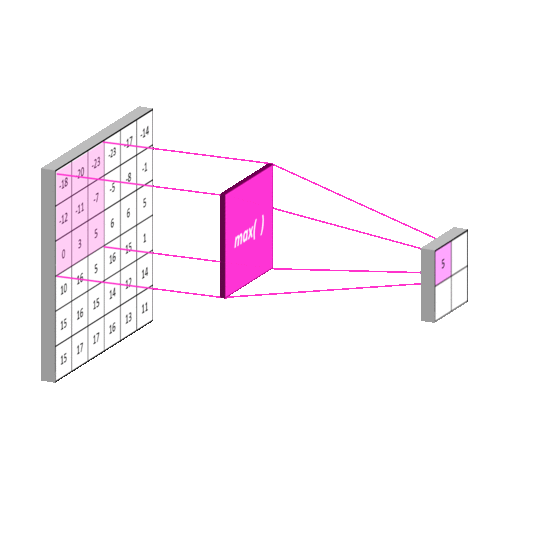
2. 池化分类：
    - Max pooling: 选图像区域的最大值作为该区域池化后的值。
    - Mean pooling：计算图像区域的平均值作为该区域池化后的值。

### 5.2.3 留下的CNN结构
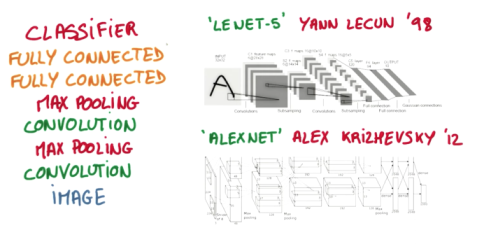

从下到上的顺序, 首先是输入的图片(image), 经过一层卷积层 (convolution), 然后在用池化(pooling)方式处理卷积的信息, 这里使用的是 max pooling 的方式. 然后在经过一次同样的处理, 把得到的第二次处理的信息传入两层全连接的神经层 (fully connected),这也是一般的两层神经网络层,最后在接上一个分类器(classifier)进行分类预测. 

## 5.5-5.7 CNN代码实战

In [71]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

- 步骤1：加载数据源

In [72]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [73]:
def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result

- 步骤2：定义Weight和biased变量

tf.truncated_normal()教程:
    https://blog.csdn.net/qq_36512295/article/details/100599979

In [74]:
def weight_variable(shape):
    #使用tf.truncted_normal产生随机变量来进行初始化
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

In [75]:
def biases_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

- 步骤3：定义卷积
    - tf.nn.conv2d函数是tensoflow里面的二维的卷积函数
    - x是图片的所有参数，W是此卷积层的权重
    - 定义步长strides=[1,1,1,1]值，strides[0]和strides[3]的两个1是默认值，中间两个1代表padding时在x方向运动一步，y方向运动一步
    - padding采用的方式是SAME，输出长和宽和输入图片x一样

In [76]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

- 步骤4：定义池化层（Max pooling）
    - tf.nn.max_pool参数含义和用：https://blog.csdn.net/coder_xiaohui/article/details/78025379
    - 池化的核函数大小为2x2，池化窗口的大小，因此ksize=[1,2,2,1]，步长为2，因此strides=[1,2,2,1]:

In [77]:
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

- 步骤5：图片处理+数据的palceholder

In [78]:
xs = tf.placeholder(tf.float32, [None, 784])/255.  #28*28
ys = tf.placeholder(tf.float32, [None, 10])
# 定义dropout的placeholder，它是解决过拟合的有效手段
keep_prob = tf.placeholder(tf.float32)

我们需要处理我们的xs，把xs的形状变成[-1,28,28,1]，-1代表先不考虑输入的图片例子多少这个维度，后面的1是channel的数量，因为我们输入的图片是黑白的，因此channel是1，例如如果是RGB图像，那么channel就是3

In [79]:
x_image = tf.reshape(xs, [-1, 28, 28, 1])

- 步骤6：构建卷积神经网络CNN
1. convolutional layer1 + max pooling;
2. convolutional layer2 + max pooling;
3. fully connected layer1 + dropout;
4. fully connected layer2 to prediction.

**6.1 定义第一层CNN**

In [80]:
# 1.定义第一层CNN
# 1.1 先定义weight和biases 
# 卷积核patch的大小是5x5，因为黑白图片channel是1所以输入是1，
# 输出是32个featuremap
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = biases_variable([32])
# 1.2 定义第一个卷积层
h_conv1 = conv2d(x_image, W_conv1) + b_conv1
# 对h_conv1进行非线性处理，也就是激活函数来处理
h_conv1 = tf.nn.relu(h_conv1)#28*28*32
# 1.3 定义最大化池化
h_pool = max_pool_2x2(h_conv1)#14*14*32

**6.2 定义第二层CNN**

In [81]:
W_conv2 = weight_variable([5,5,32,64])
b_conv2 = biases_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool, W_conv2) + b_conv2)#14*14*64

h_pool2 = max_pool_2x2(h_conv2)#7*7*64

**6.3 建立全连接层**
1. 结果展平：将三维的输出值变为一维的数据
2. 扩大输出size：weight和biases的输出size
3. 两次普通神经网络构建，含过拟合处理
4. 最后进行softmax分类器分类

In [82]:
# -1表示先不考虑输入图片例子维度,
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])

此时weight_variable的shape输入就是第二个卷积层展平了的输出大小: 7x7x64， 后面的输出size我们继续扩大，定为1024
变成 7x7x64 * 1024的矩阵格式

In [83]:
W_fc1 = weight_variable([7*7*64, 1024])
b_fc1 = biases_variable([1024])

h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1) #1024
# 如果我们考虑过拟合问题，可以加一个dropout的处理
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

**第二次全连接神经网络构建**

In [84]:
W_fc2 = weight_variable([1024,10])
b_fc2 = biases_variable([10])
h_fc2 = tf.matmul(h_fc1_drop, W_fc2)+b_fc2
prediction = tf.nn.softmax(h_fc2)

**6.4 损失值和优化器**

In [85]:
#损失值用交叉熵表示 
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction), 
                                             reduction_indices=[1]))

# 训练用AdamOptimizer优化器
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

**6.5 初始化并激活变量**

In [86]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

- 步骤7 定义compute_accuracy(v_xs, v_ys)函数

- 步骤8：训练多次

In [ ]:
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
    if i % 50 ==0:
        print(compute_accuracy(mnist.test.images[:1000], mnist.test.labels[:1000]))


0.152
0.755
0.854
0.87
0.901
0.914
0.918
0.929
0.944
0.947
0.949
0.957
0.958
0.959
0.958
0.964
0.966
0.96
0.97
0.966
